# A CNN-based brain tumor detection model

### STEP 1: IMPORTING ALL THE NECESARY LIBRARIES:



In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


### STEP 2: SETTING UP THE DATASET PATHS AND DIRECTORIES: 


In [48]:
# Set the path to the dataset
dataset_path = "C:/Users/anand/OneDrive/Desktop/brain_tumor_app/dataset"

# Define the training and testing directories
train_dir = os.path.join(dataset_path, "C:/Users/anand/OneDrive/Desktop/brain_tumor_app/dataset/Train")
test_dir = os.path.join(dataset_path, "C:/Users/anand/OneDrive/Desktop/brain_tumor_app/dataset/Test")

# Define the categories
categories = ["glioma", "meningioma", "notumor", "pituitary"]


### STEP 3: LOADING AND PREPROCESSING THE DATASET: 




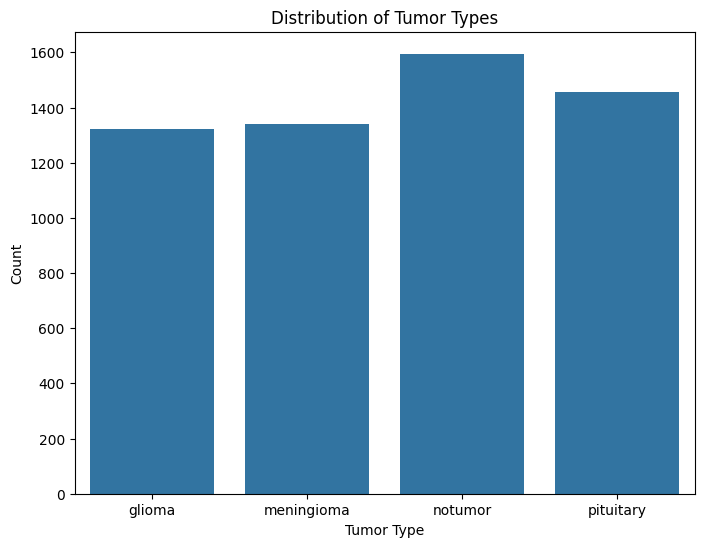

In [6]:
# Load and preprocess the dataset
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)

# Visualize the distribution of tumor types in the training dataset
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x="Category", y="Count")
plt.title("Distribution of Tumor Types")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()


### STEP 4: VISUALIZING IMAGES FOR EACH TUMOR TYPES: 




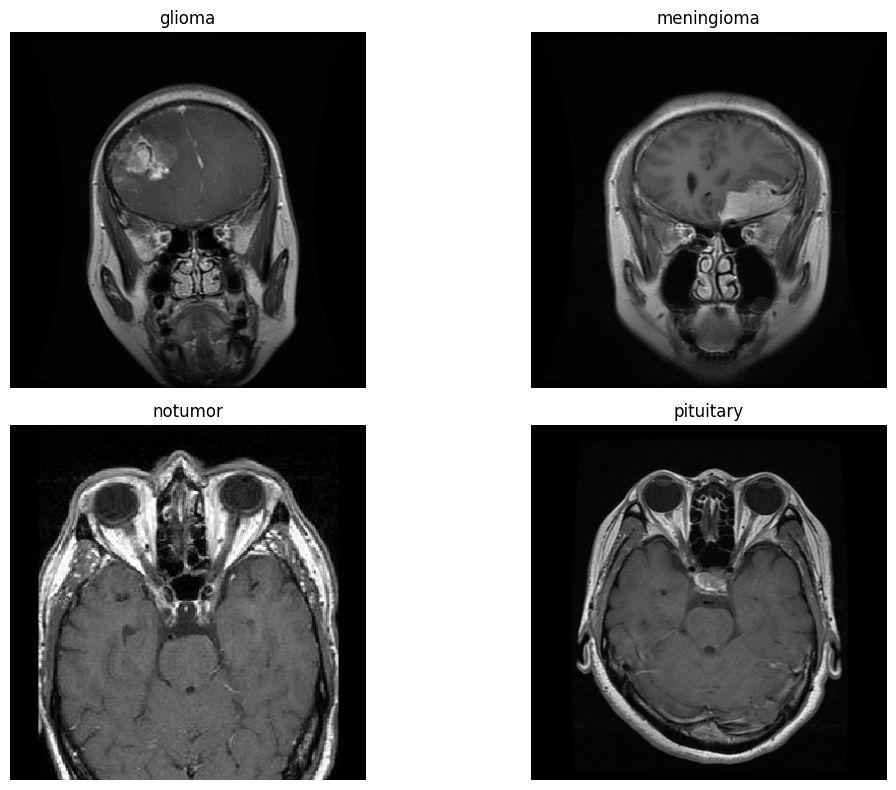

In [47]:
# Visualize sample images for each tumor type
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

### STEP 5: SETTING UP THE IMAGE_SIZE, BATCH_SIZE AND EPOCHS FOR THE MODEL:



In [9]:
# Set the image size
image_size = (150, 150)

# Set the batch size for training
batch_size = 32

# Set the number of epochs for training
epochs = 50

### STEP 6: DATA AUGMENTATION AND PREPROCESSING:

In [10]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


### STEP 7: BUILDING THE MODEL ARTITECHURE

In [11]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


c:\Users\anand\OneDrive\Desktop\brain_tumor_app\neurocare_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

c:\Users\anand\OneDrive\Desktop\brain_tumor_app\neurocare_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 89s 484ms/step - accuracy: 0.4478 - loss: 1.1710 - val_accuracy: 0.4859 - val_loss: 1.3523
Epoch 2/50
  1/178 ━━━━━━━━━━━━━━━━━━━━ 42s 240ms/step - accuracy: 0.6875 - loss: 0.8195

c:\Users\anand\OneDrive\Desktop\brain_tumor_app\neurocare_env\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.6875 - loss: 0.8195 - val_accuracy: 0.4992 - val_loss: 1.3225
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 81s 457ms/step - accuracy: 0.7092 - loss: 0.7484 - val_accuracy: 0.6539 - val_loss: 0.9120
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8438 - loss: 0.4180 - val_accuracy: 0.6711 - val_loss: 0.8507
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 78s 438ms/step - accuracy: 0.7431 - loss: 0.6405 - val_accuracy: 0.6609 - val_loss: 0.9115
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6250 - loss: 0.6165 - val_accuracy: 0.6492 - val_loss: 0.9502
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 86s 484ms/step - accuracy: 0.7705 - loss: 0.5822 - val_accuracy: 0.7273 - val_loss: 0.7392
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6875 - loss: 0.6095 - val_accuracy: 0.7195 - val_loss: 0.7204
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 92s 516ms/step - accuracy: 0.7876 - loss: 0.5322 - val_accurac

### STEP 8: VISUALIZATION THROUGH GRAPH

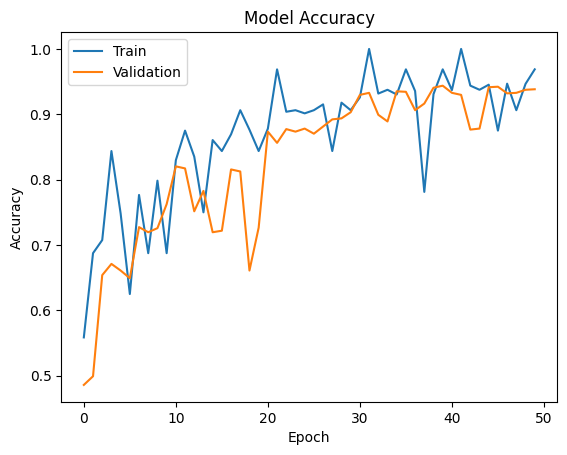

In [13]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

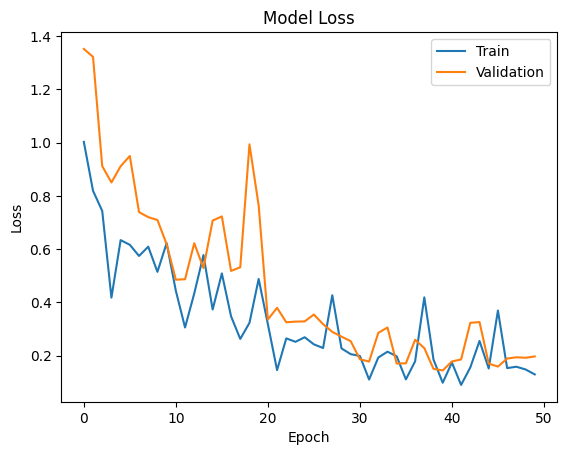

In [14]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

### STEP 9: EVALUATION

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.9092 - loss: 0.2630
Test Loss: 0.19713594019412994
Test Accuracy: 0.938281238079071


### STEP 10: CONFUSION MATRIX AND EXPLANATION:

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step


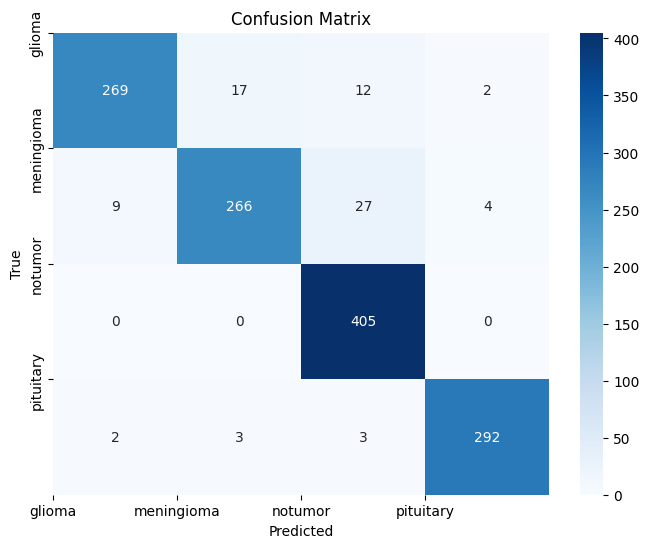

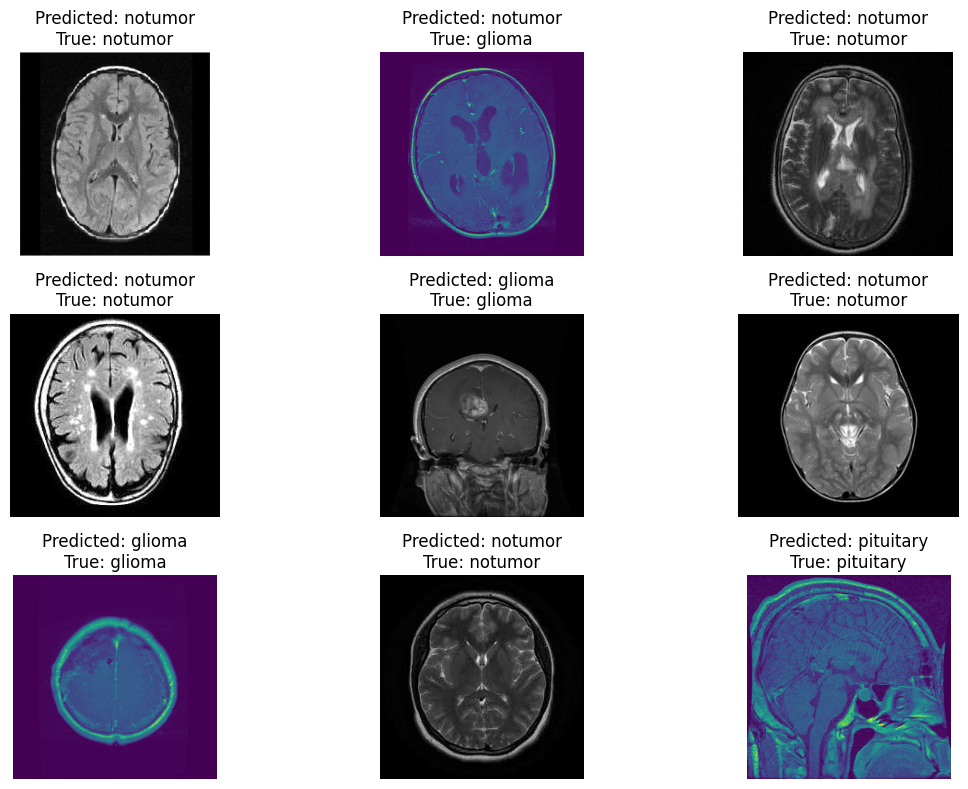

In [21]:
# Make predictions on the test dataset
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

# Create a confusion matrix
confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.yticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()

# Plot sample images with their predicted and true labels
test_images = test_generator.filenames
sample_indices = np.random.choice(range(len(test_images)), size=9, replace=False)
sample_images = [test_images[i] for i in sample_indices]
sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


Class: glioma
Precision: 0.9607142857142857
Recall: 0.8966666666666666
F1-Score: 0.9275862068965517

Class: meningioma
Precision: 0.9300699300699301
Recall: 0.869281045751634
F1-Score: 0.8986486486486487

Class: notumor
Precision: 0.9060402684563759
Recall: 1.0
F1-Score: 0.9507042253521127

Class: pituitary
Precision: 0.9798657718120806
Recall: 0.9733333333333334
F1-Score: 0.9765886287625419



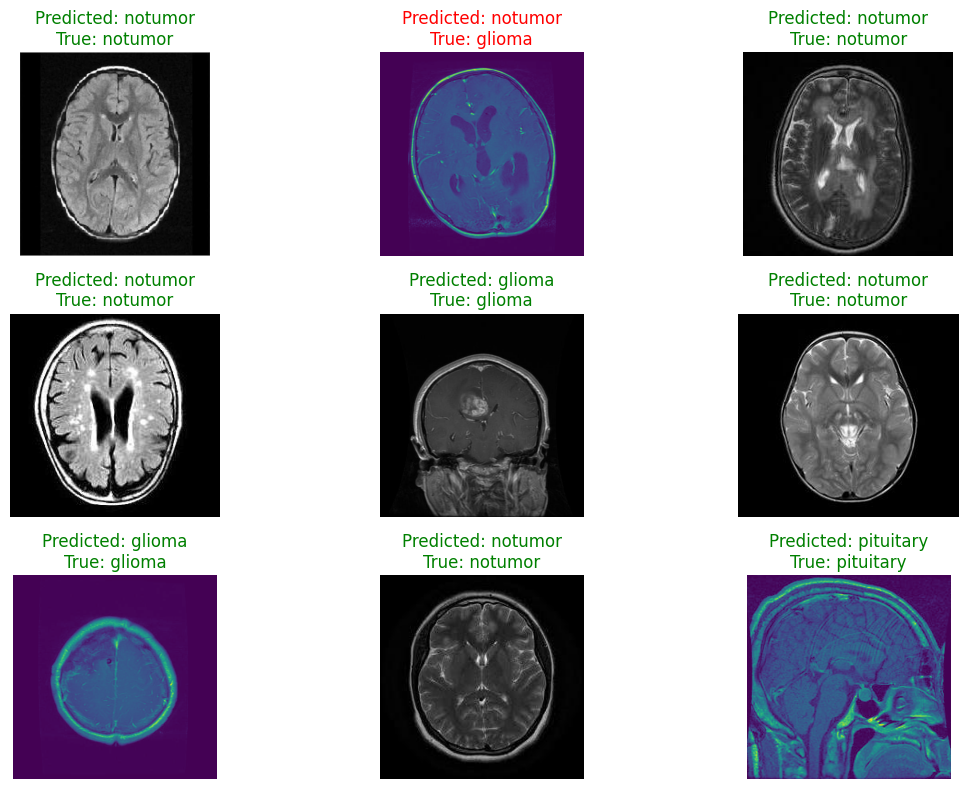

In [23]:
# Calculate precision, recall, and F1-score from the confusion matrix
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1-score for each class
for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-Score: {f1_score[i]}")
    print()

# Analyze the sample images and their predictions
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    if sample_predictions[i] == sample_true_labels[i]:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='green')
    else:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='red')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [24]:
# Save the trained model
model.save("brain_tumor_detection_model.keras")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


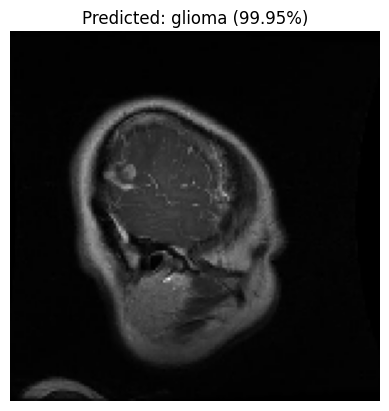

In [46]:
from tensorflow.keras.preprocessing import image

# Set your image path here
image_path ="C:/Users/anand/OneDrive/Desktop/brain_tumor_app/dataset/Test/glioma/Te-gl_0173.jpg"

# Load and preprocess the image
img = image.load_img(image_path, target_size=image_size)
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Rescale
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict using the trained model
prediction = model.predict(img_array)
predicted_class = categories[np.argmax(prediction)]
prediction_percentage = np.max(prediction) * 100

# Show the image and prediction with percentage
plt.imshow(img)
plt.title(f"Predicted: {predicted_class} ({prediction_percentage:.2f}%)")
plt.axis("off")
plt.show()
